### Ajustes con Métodos bayesianos (MCMC)

El módulo emcee (ensamble de caminantes de Markov) es una biblioteca en Python diseñada para realizar ajuste de parámetros y realizar inferencia bayesiana utilizando el método de cadenas de Markov Monte Carlo (MCMC). El MCMC es una técnica que permite muestrear de manera eficiente distribuciones de probabilidad, especialmente en problemas de alta dimensionalidad

In [6]:
import numpy as np
import emcee
import matplotlib.pyplot as plt

## Implementación de el módulo emcee para ajustar un modelo a datos observacionales: <br>

Se ajustará una línea recta (modelo) a datos sintéticos usando emcee. La cadena de Markov se ejecuta durante un número de pasos (n_steps), y las muestras se extraen para analizar y visualizar los resultados.

In [7]:
# Definir el modelo que se ajustará
def modelo(theta, x):
    a, b = theta
    return a * x + b

# Definir la función de probabilidad logarítmica
def log_likelihood(theta, x, y, yerr):
    model = modelo(theta, x)
    sigma2 = yerr**2
    return -0.5 * np.sum((y - model)**2 / sigma2 + np.log(sigma2))

# Definir el prior para los parámetros
def log_prior(theta):
    a, b = theta
    if -5.0 < a < 5.0 and -20.0 < b < 20.0:
        return 0.0
    return -np.inf

# Definir el posterior, que es proporcional al producto del likelihood y prior
def log_posterior(theta, x, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, yerr)

100%|██████████| 1000/1000 [00:00<00:00, 1302.11it/s]


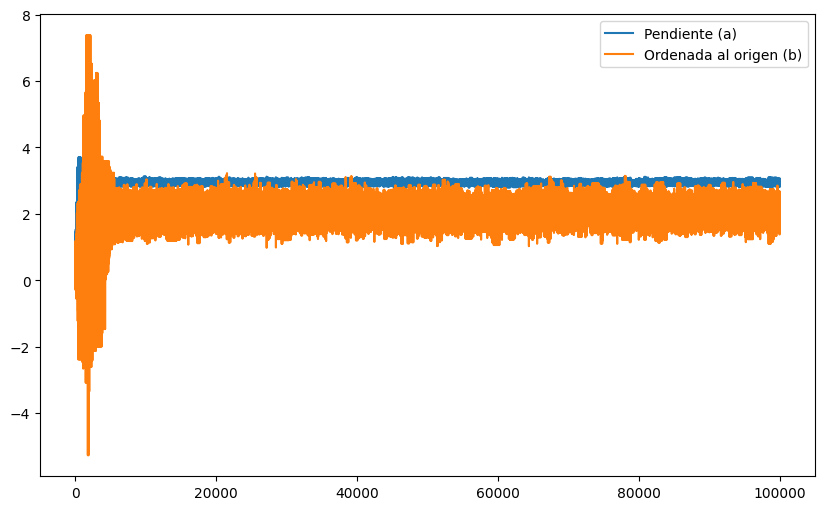

In [8]:
# Generar datos sintéticos
np.random.seed(42)
x = np.linspace(0, 10, 50)
y = 3.0 * x + 2.0 + np.random.normal(0, 1, len(x))

# Configurar el MCMC
nwalkers = 100
ndim = 2
pos = np.random.rand(nwalkers, ndim)
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(x, y, 1.0))

# Realizar la cadena de Markov
n_steps = 1000
sampler.run_mcmc(pos, n_steps, progress=True)

# Obtener las muestras de la cadena
samples = sampler.get_chain(flat=True)

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.plot(samples[:, 0], label='Pendiente (a)')
plt.plot(samples[:, 1], label='Ordenada al origen (b)')
plt.legend()
plt.show()
